# Домашнее задание по ИС
## Выполнил студент первого курса магистратуры АСЭС - Позняков Владислав


## 0. Подготовка

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import matplotlib.image as mpimg
import missingno as mno # библиотека для удобной визуализации пропусков

In [7]:
data = pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### **Можем видеть, что количество значений по столбцам Age, Cabin, Embarked отличаются от остальных - вероятно, пропуски**

## 1.1 Анализ пропусков

In [9]:
data.isna().sum() # Как и полагалось

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
((data.isna().sum() / len(data)) * 100).round(3)

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Cabin          77.104
Embarked        0.224
dtype: float64

#### Итого у нас пропусков:
##### Age: ~19.9%
##### Cabin: ~77.1%
##### Embarked: ~0.2%
#### Визуализируем:

<Axes: >

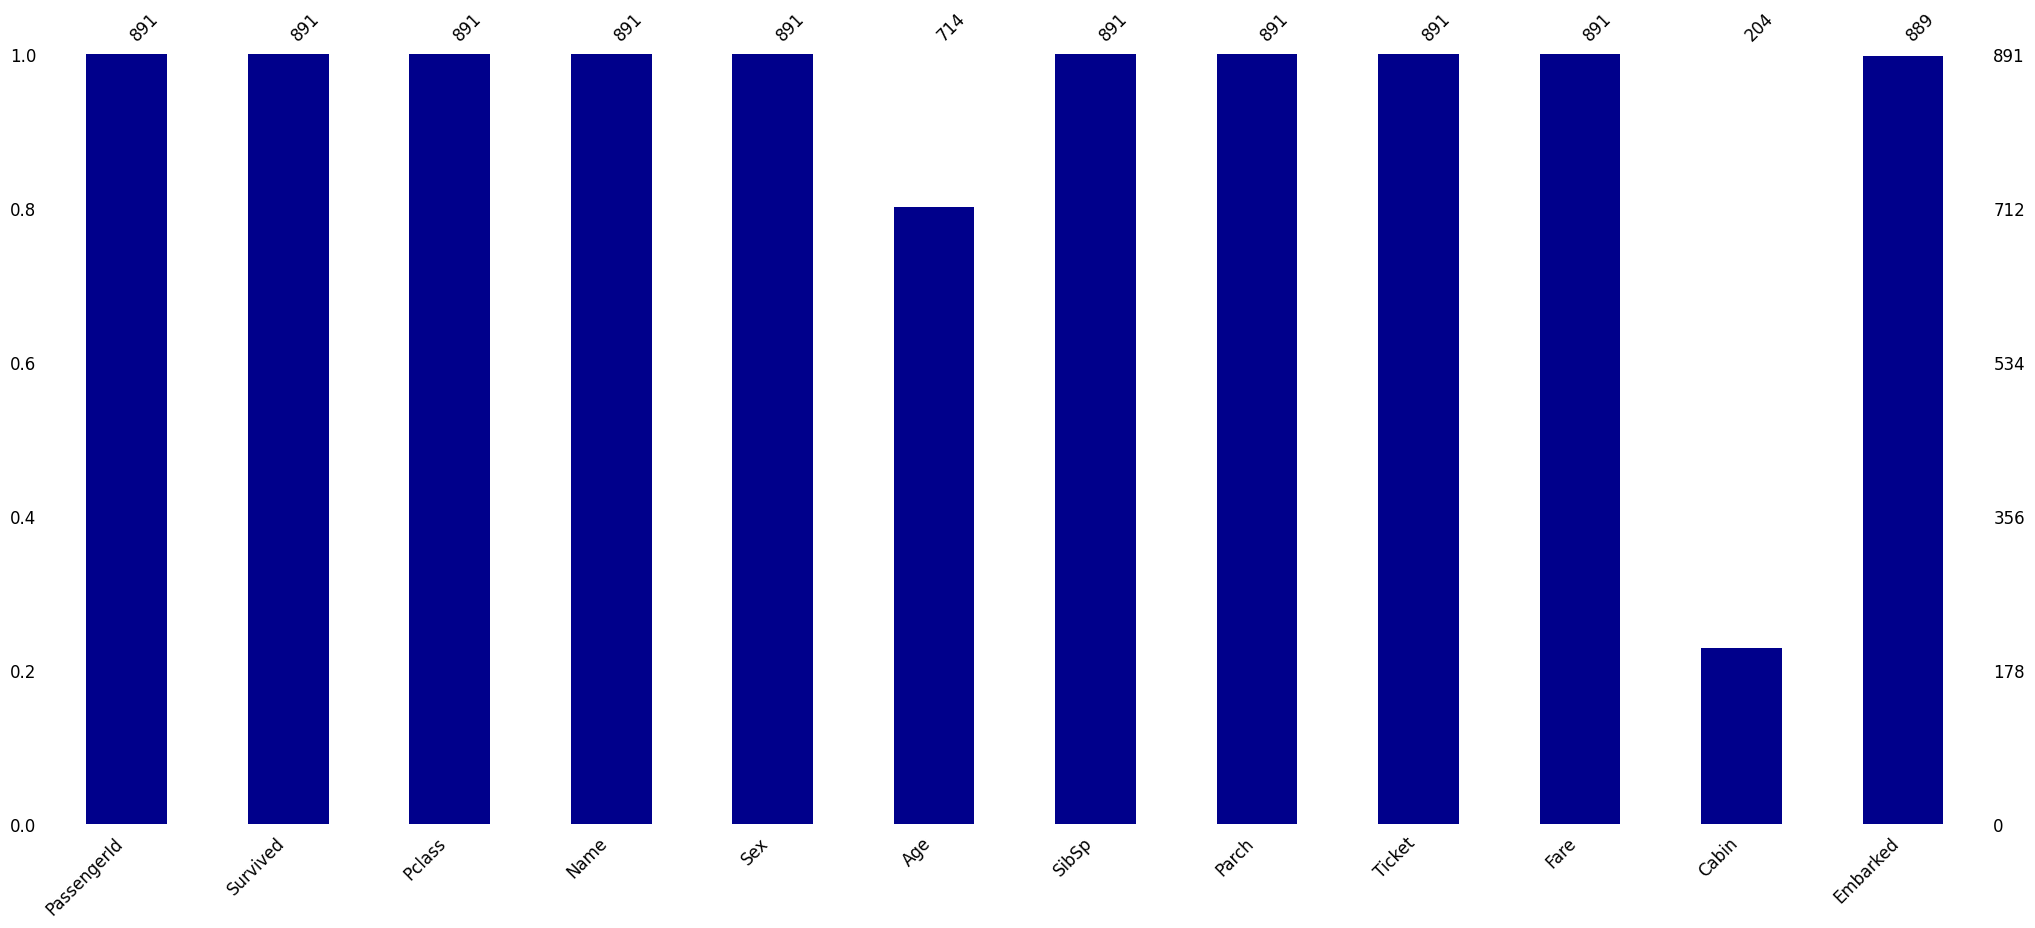

In [34]:
mno.bar(data, color='darkblue', fontsize=12)

<Axes: >

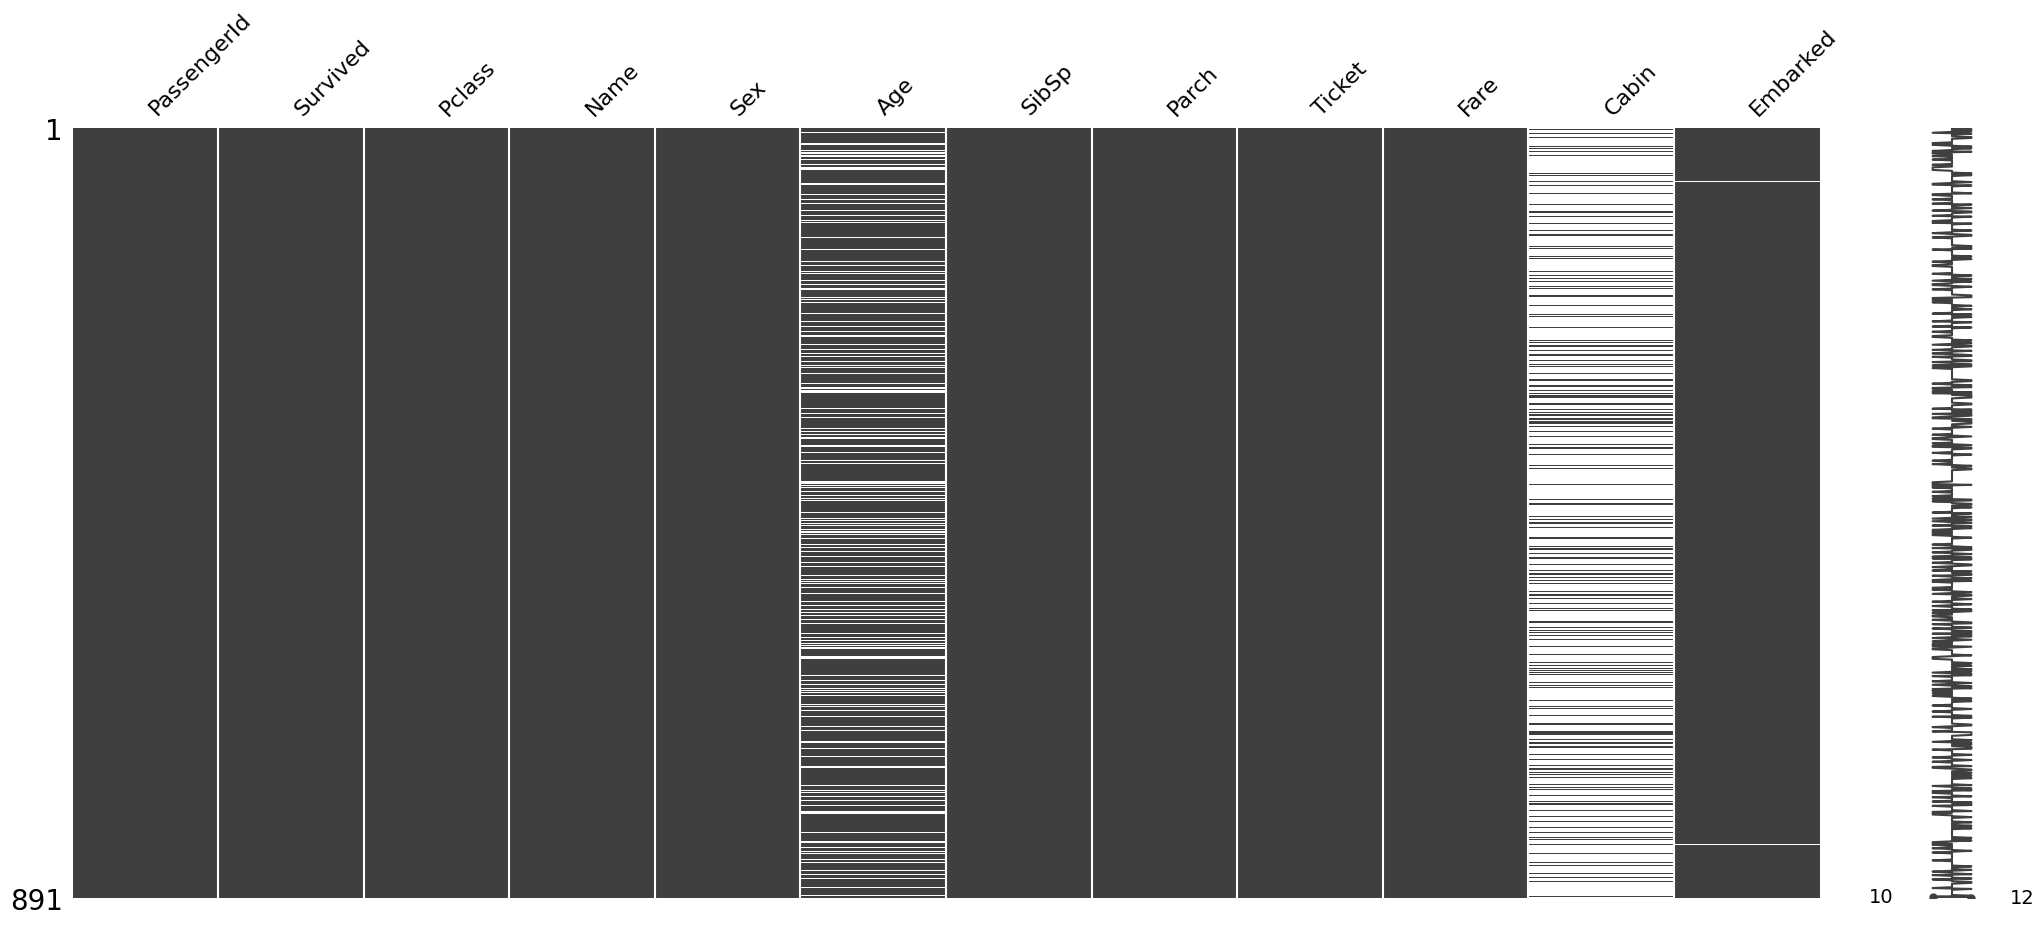

In [37]:
mno.matrix(data)

#### Случайный характер пропусков (MCAR). Неудивительно, как такогого порядка в данных нет. По крайней мере, можем судить о том, что причина пропусков не возникла в процессе подгрузки датасета. Таковы данные

#### Но связаны ли они?

<Axes: >

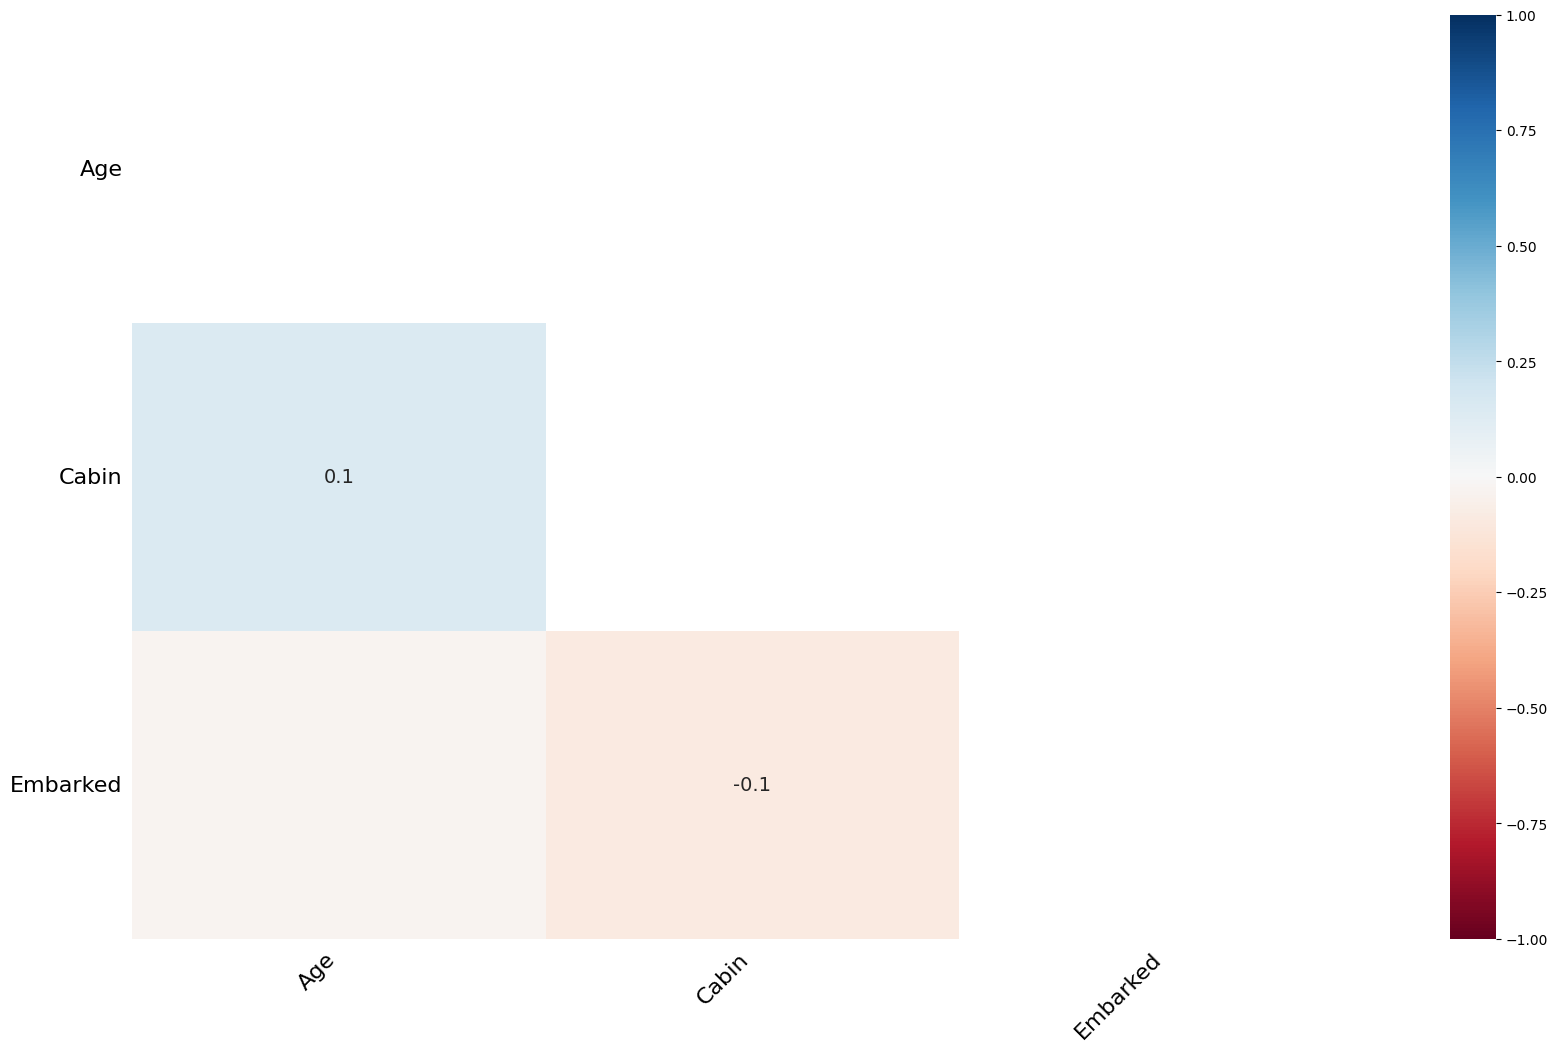

In [38]:
mno.heatmap(data)

<Axes: >

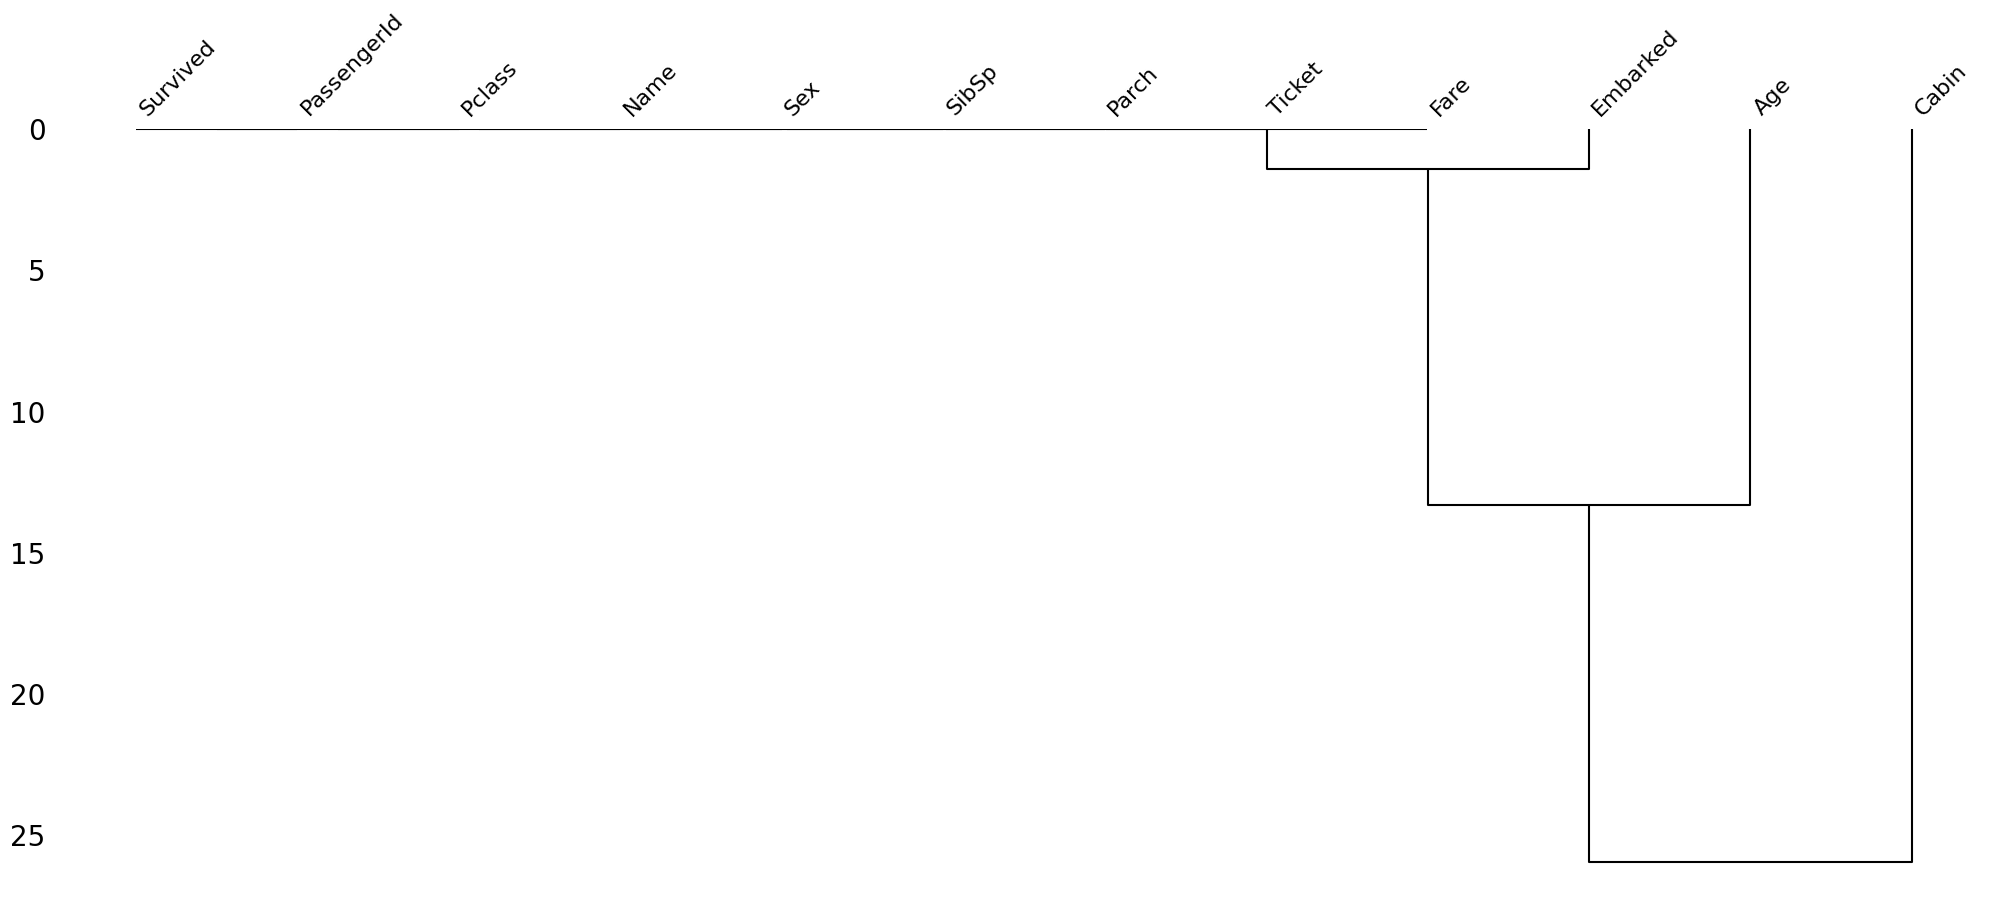

In [40]:
mno.dendrogram(data)

#### Очевидных связей нет. У нас не так много столбцов с пропусками, группировать не по чему. Больше пропусков в целом - больше шанс пересечений с другими пропусками (cabin имеет целых 77%)

## 1.2 Обработка пропусков

### Cabin

In [45]:
((data['Cabin'].isnull().sum() / len(data)) *100).round(3)

77.104

#### В целом, 77% пропусков - слишком много. Использование данного показателя в моделях будет бесполезным. В случае использования 23-% данных модель м.б. недообучена. Так что возможны два варианта:
- Бинаризация показателя (есть информация о кабине / нет информации)
- Удаление столбца / неиспользование его в анализе
#### Сложно представить, какую адекватную задачу можно решать после первого способа. Поэтому используем второй

In [50]:
data.drop(columns = ['Cabin'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Embarked

In [73]:
((data['Embarked'].isnull().sum() / len(data)) *100).round(3)

0.224

#### Всего 2 пропуска (0.2%). Такая потеря в данных не кажется значительной. Поэтому можно удалить строки

In [54]:
data_c=data.copy()
data_c.dropna(subset = ['Embarked'], inplace = True)
((data_c['Embarked'].isnull().sum() / len(data)) *100).round(3)

0.0

#### НО! Взглянем, что же это за пропуски на самом деле:

In [62]:
df[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### [Icard, Miss. Amelie](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)

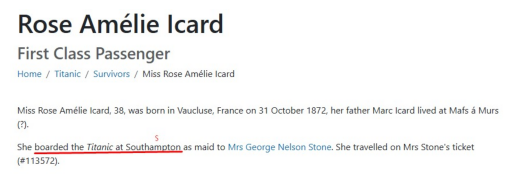

In [71]:
img1 = mpimg.imread('1.jpg')

# Отображение изображения
plt.imshow(img1)
plt.axis('off')  # Отключить оси
plt.show()

##### [Stone, Mrs. George Nelson (Martha Evelyn)](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

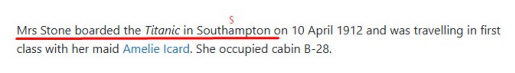

In [72]:
img2 = mpimg.imread('2.jpg')

# Отображение изображения
plt.imshow(img2)
plt.axis('off')  # Отключить оси
plt.show()

##### Можно вручную поискать и по показателю Cabin, но уж слишком их много, показатель неинформативный - дело неблагодарное

In [74]:
data.loc[61, 'Embarked'] = 'S'
data.loc[829, 'Embarked'] = 'S' 
((data['Embarked'].isnull().sum() / len(data)) *100).round(3) # ПРОПУСКОВ НЕТ ^_^

0.0

### Age

In [122]:
((data['Age'].isnull().sum() / len(data)) *100).round(3)

19.865

#### Самое нетривиальное именно с этим показателем. 
#### -Исключить строки - слишком много данных теряем (20%),
#### -Исключить столбец - кажется слишком интересным для дальнейшего анализа. 
#### -Замена константой вроде нуля "испортит" выводы. 
#### -Можно срегрессировать, заполнить пропуски предсказаниями. Но кажется слишком слабо интуитивно понятным смысл предсказания на основе имещихся данных - как мы предскажем возраст человека на основе того, какой у него пол или место посадки (хотя, справедливости ради, в машинном обучении и не такое ХОРОШО срабатывает)

#### Взглянем на распределение

Text(0.5, 1.0, 'Age до обработки')

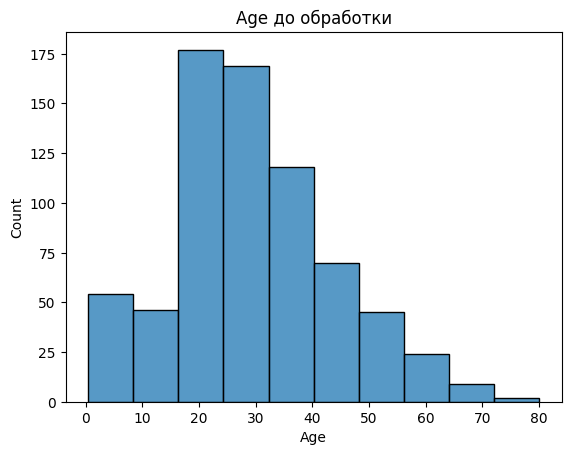

In [77]:
sns.histplot(data['Age'], bins = 10)
plt.title('Age до обработки')

#### Попробуем заполнить медианой

In [81]:
med = df['Age'].median()
data_med = data.copy()
data_med['Age'].fillna(med, inplace=True)
((data_med['Age'].isnull().sum() / len(data)) *100).round(3)

C:\Users\Noneconomist\AppData\Local\Temp\ipykernel_16496\1849871531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_med['Age'].fillna(med, inplace=True)


0.0

Text(0.5, 1.0, 'Age с заменой на медиану')

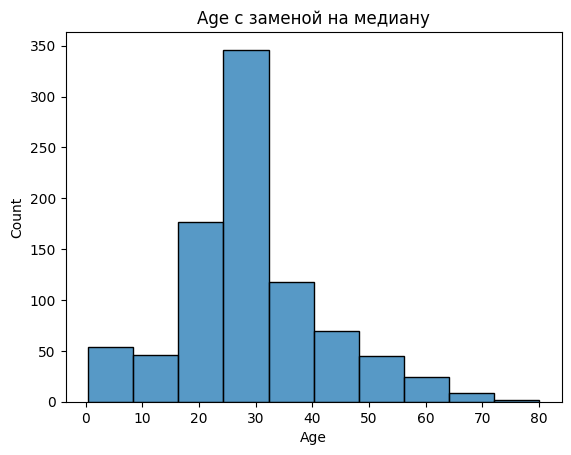

In [85]:
sns.histplot(data_med['Age'], bins = 10)
plt.title('Age с заменой на медиану')

#### Потеряли столь ценную дисперсию( Аналогично будет и с модой, и со средним.\

#### Попробуем заменить медианой по классам (Пол и класс билета кажутся наиболее подходящими из возможных данных: во-первых, чем старше человек, тем, нередко, он может быть куда более платежеспособным; во-вторых, поло-возрастная структура населения тоже в каком-то роде свойственна для разных времен)

In [126]:
data_med_class = data.copy()
data_med_class['Age'].fillna(
    data_med_class.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace=True)

C:\Users\Noneconomist\AppData\Local\Temp\ipykernel_16496\2270549498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_med_class['Age'].fillna(


In [127]:
((data_med_class['Age'].isnull().sum() / len(data)) *100).round(3)

0.0

Text(0.5, 1.0, 'Age с заменой на медиану по классам')

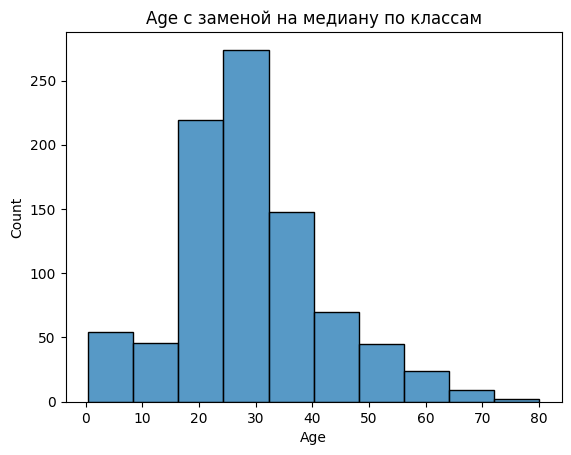

In [128]:
sns.histplot(data_med_class['Age'], bins = 10)
plt.title('Age с заменой на медиану по классам')

#### Такое распределение куда ближе к начальному, чем обычный медианный метод

#### Также исключим из датасета то, что бесполезно для анализа:

In [132]:
titanic = data_med_class.drop(columns=['Name', 'Ticket', 'PassengerId'])

In [133]:
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 2. Анализ и описание основных статистик датафрейма

In [135]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [216]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Половая структура

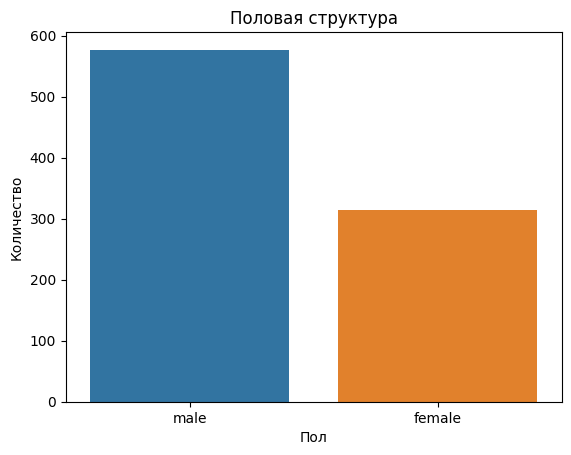

In [140]:
sns.countplot(x='Sex', data=titanic, hue='Sex')

plt.title('Половая структура')
plt.xlabel('Пол')
plt.ylabel('Количество')

plt.show()

In [142]:
titanic["Sex"].value_counts()  # видим, что мужчин больше

Sex
male      577
female    314
Name: count, dtype: int64

### По классам билетов

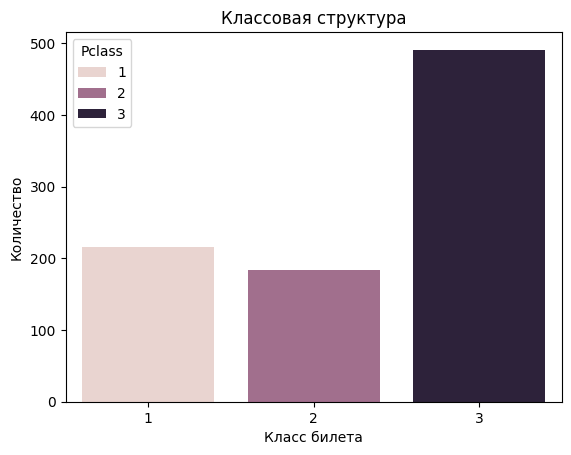

In [143]:
sns.countplot(x='Pclass', data=titanic, hue='Pclass')

plt.title('Классовая структура')
plt.xlabel('Класс билета')
plt.ylabel('Количество')

plt.show()

In [145]:
titanic["Pclass"].value_counts()  # естественно, что 3 класс наиболее большой. что необычно - превосходство первого класса над вторым

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

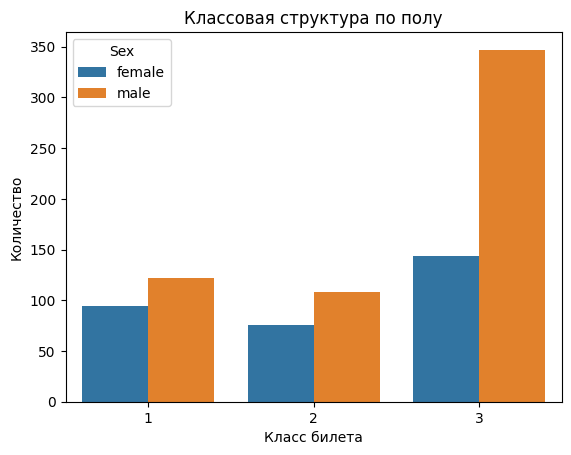

In [153]:
sns.countplot(x='Pclass', data=titanic, hue='Sex')

plt.title('Классовая структура по полу')
plt.xlabel('Класс билета')
plt.ylabel('Количество')

plt.show() #мужчин больше в каждом классе, как и в целом

### Место посадки

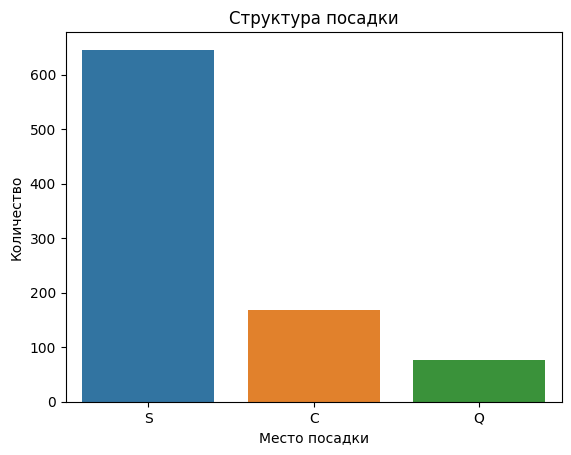

In [151]:
sns.countplot(x='Embarked', data=titanic, hue = 'Embarked')

plt.title('Структура посадки')
plt.xlabel('Место посадки')
plt.ylabel('Количество')

plt.show() # Southampton - наиболее частое место посадки

In [152]:
titanic['Embarked'].value_counts() 

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

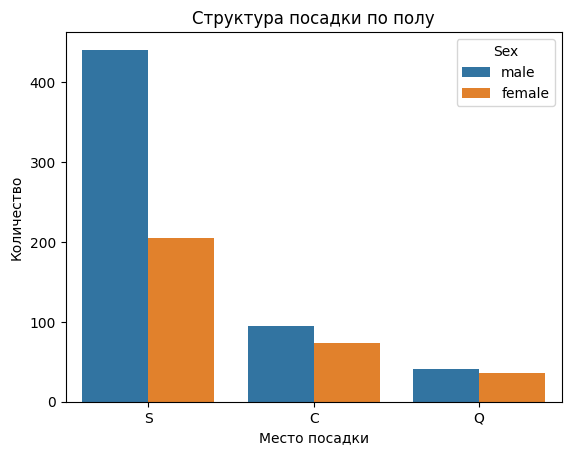

In [155]:
sns.countplot(x='Embarked', data=titanic, hue = 'Sex')

plt.title('Структура посадки по полу')
plt.xlabel('Место посадки')
plt.ylabel('Количество')

plt.show() #соотношение мужчин и женщин в Southampton наименее похоже, большой отрыв среди мужчин

### Возрастная структура

In [181]:
stats_age = titanic['Age'].agg(
    mean='mean',         # Среднее
    median='median',     # Медиана 
    std='std',           # Стандартное отклонение
    min='min',           # Минимум
    max='max',           # Максимум
    Q25=lambda x: x.quantile(0.25),  # 25-й квантиль
    Q75=lambda x: x.quantile(0.75)   # 75-й квантиль
)

print(stats_age) 

mean      29.112424
median    26.000000
std       13.304424
min        0.420000
max       80.000000
Q25       21.500000
Q75       36.000000
Name: Age, dtype: float64


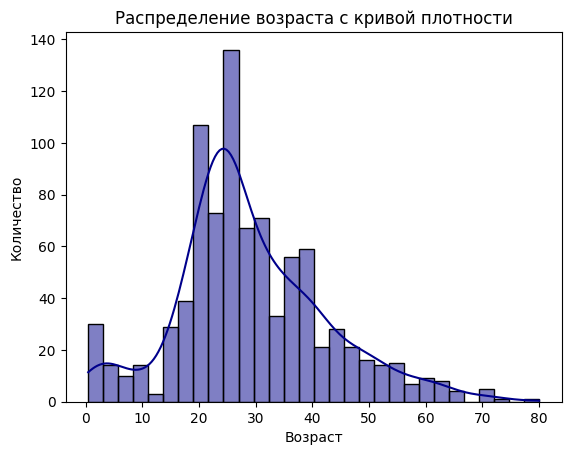

In [167]:
sns.histplot(titanic['Age'], kde=True, color='darkblue', bins=30)  
plt.title('Распределение возраста с кривой плотности')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show() 

#### Наибольшая доля пассажиров от 21 до 36 лет, судя по квантилям

In [180]:
stats_sex = titanic.groupby('Sex')['Age'].agg(
    mean='mean',         # Среднее
    median='median',     # Медиана 
    std='std',           # Стандартное отклонение
    min='min',           # Минимум
    max='max',           # Максимум
    Q25=lambda x: x.quantile(0.25),  # 25-й квантиль
    Q75=lambda x: x.quantile(0.75)   # 75-й квантиль
)

print(stats_sex)

             mean  median        std   min   max   Q25   Q75
Sex                                                         
female  27.261146    24.0  13.111827  0.75  63.0  21.0  35.0
male    30.119879    27.0  13.311447  0.42  80.0  23.0  37.0


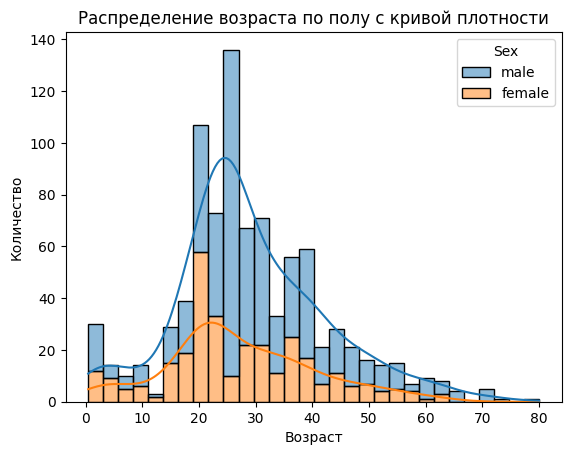

In [173]:
sns.histplot(data=titanic, x='Age', hue='Sex', multiple='stack', kde=True, bins=30)
plt.title('Распределение возраста по полу с кривой плотности')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend
plt.show()

### Выживаемость в призме различных показателей

#### Влияние ПОЛА на выживаемость следующее:

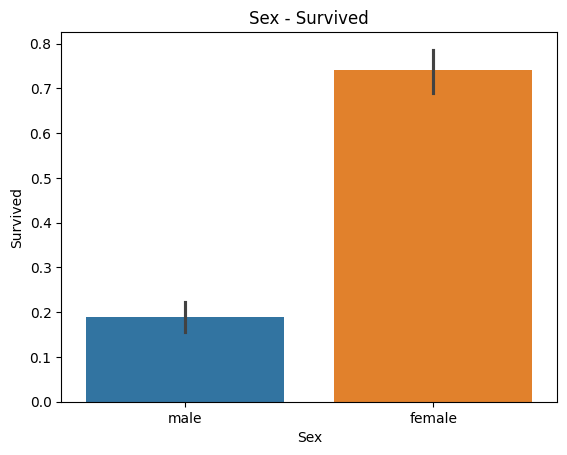

In [185]:
sns.barplot(x='Sex', y='Survived', data=titanic, hue='Sex')
plt.title('Пол- Выживаемость')
plt.show()

##### То есть выживаемость среди женщин выше в разы

#### Влияние класса билета на выживаемость по полу

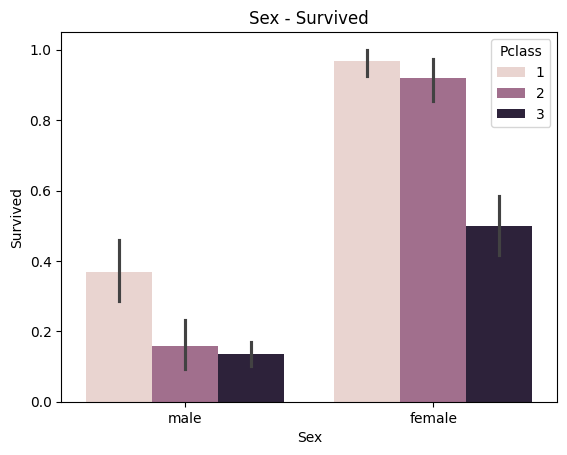

In [187]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic)
plt.title('Пол- Выживаемость по классу')
plt.show()

##### Для обеих категорий выживаемость соответствует классу: лучше класс - выше выживаемость, однако среди мужчин влияние первого класса сильнее, когда среди женщин первый и второй классы не столь сильно отличаются

#### Влияние числа родственников на выживаемость

In [191]:
titanic['relatives'] = titanic['SibSp'] + titanic['Parch']
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
176,0,3,male,25.0,3,1,25.4667,S,4
836,0,3,male,21.0,0,0,8.6625,S,0
576,1,2,female,34.0,0,0,13.0000,S,0
367,1,3,female,21.5,0,0,7.2292,C,0
729,0,3,female,25.0,1,0,7.9250,S,1


In [194]:
stats_relatives = titanic['relatives'].agg(
    mean='mean',         # Среднее
    median='median',     # Медиана 
    std='std',           # Стандартное отклонение
    min='min',           # Минимум
    max='max',           # Максимум
    Q25=lambda x: x.quantile(0.25),  # 25-й квантиль
    Q75=lambda x: x.quantile(0.75)   # 75-й квантиль
)
print(stats_relatives)

mean       0.904602
median     0.000000
std        1.613459
min        0.000000
max       10.000000
Q25        0.000000
Q75        1.000000
Name: relatives, dtype: float64


##### Большинство либо не имеет родственников (в т.ч. мужей/жен), либо имеет одного

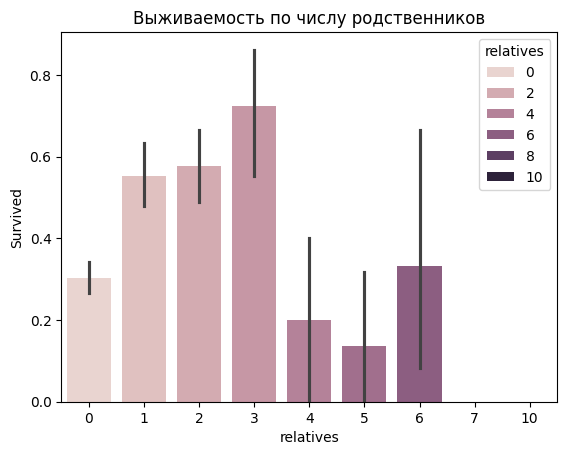

In [198]:
sns.barplot(x='relatives', y='Survived', hue='relatives', data=titanic)
plt.title('Выживаемость по числу родственников')
plt.show()

##### Не слишком информативно. Но выживаемость среди тех, кто имеет 1-3 родственников по нарастанию выживаемость выше. Тем не менее, это может оказаться статистическим фейком. Ибо таких людей, в целом, немного - могло совпасть

#### Выживаемость от возраста

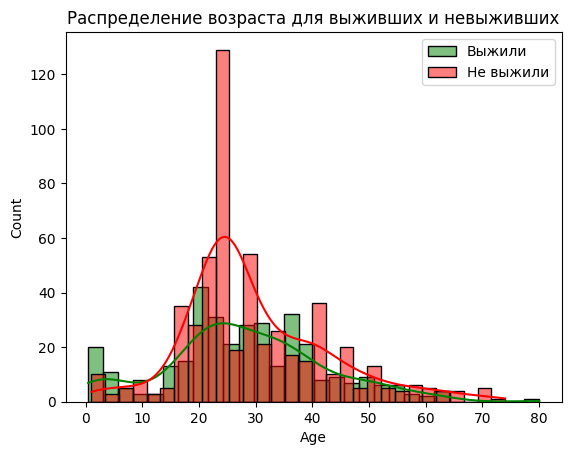

In [207]:
sns.histplot(titanic[titanic['Survived'] == 1]['Age'], kde=True, bins=30, color='green', label='Выжили')
sns.histplot(titanic[titanic['Survived'] == 0]['Age'], kde=True, bins=30, color='red', label='Не выжили')

plt.title('Распределение возраста для выживших и невыживших')
plt.legend()
plt.show()

C:\Users\Noneconomist\AppData\Local\Temp\ipykernel_16496\2506697900.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = titanic.groupby('AgeGroup')['Survived'].mean().round(2)


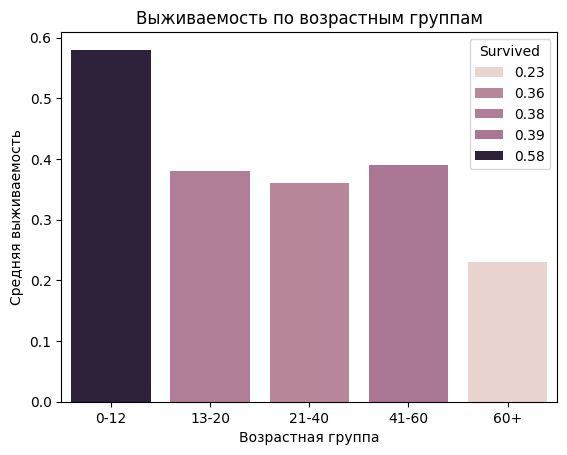

In [213]:
age_b = [0, 12, 20, 40, 60, 100]
age_l = ['0-12', '13-20', '21-40', '41-60', '60+']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_b, labels=age_l)

age_group = titanic.groupby('AgeGroup')['Survived'].mean().round(2)


sns.barplot(x=age_group.index, y=age_group.values, hue=age_group)

plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя выживаемость')
plt.show()

##### Выживаемость выше среди детей до 12 лет, наименьшая - среди старых (более 60 лет)

### Баловство 

In [225]:
total_fare = data['Fare'].sum().round(2)
total_fare

28693.95

In [222]:
not_survived_count = data[data['Survived'] == 0].shape[0]
not_survived_count

549

In [224]:
##### Итого доход 28693.95  у.е. (наверное, фунтов), расходы - 549 ПАССАЖИРОВ :(